- 교재 : 
- 공부 블로그 : 
- ㄴㅇ

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from preamble import *

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

w[0]: 0.393906  b: -0.031804


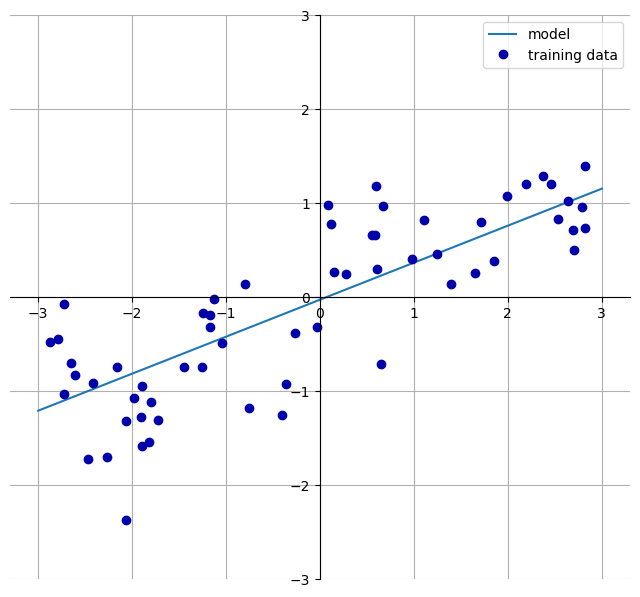

In [3]:
mglearn.plots.plot_linear_regression_wave()

# 결과 : w[0]: 0.393906  b: -0.031804

### 저차원데이터

#### 1.선형모델 만들기

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60) #샘플개수60개

# training set과 test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 선형모델(LinearRegression) 학습
lr = LinearRegression().fit(X_train, y_train)

#기울기 파라미터(w)는 가중치weight 또는 계수coefficient라고 하며 
# lr 객체의 coef_ 속성에 저장되어 있고 
# 편향offset 또는 절편intercept 파라미터(b)는 intercept_ 속성에 저장되어 있습니다.

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# 결과 
# lr.coef_: [ 0.394]
# lr.intercept_: -0.031804343026759746

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


#### 2.모델 성능 확인

In [5]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 결과
# 훈련 세트 점수: 0.67
# 테스트 세트 점수: 0.66

# 점수가 매우 비슷함. 과소적합 상태를 의미한다. 
# 고차원 데이터셋에서 선형모델은 성능이 높아져서 과대적합이 될 가능성이 높다.

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


### 고차원데이터 : 보스턴 집값

In [6]:
# 고차원 데이터로 다뤄보기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 결과
# 훈련 세트 점수: 0.95
# 테스트 세트 점수: 0.61

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 3.Ridge Regression으로 적용하기 : 보스턴 집값

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha=1.0
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# 결과
# 훈련 세트 점수: 0.89
# 테스트 세트 점수: 0.75

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.   
모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨.

In [8]:
# alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있음
# alpha값을 줄이면 계수에 대한 제약이 그만큼 풀려서 과대적합의 방향으로 이동하고, 
# 결국 LinearRegression과 비슷해진다.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
# 최적의 alpha 값은 사용하는 데이터셋에 따라 다름

# 결과
# 훈련 세트 점수: 0.79
# 테스트 세트 점수: 0.64

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# 결과
# 훈련 세트 점수: 0.93
# 테스트 세트 점수: 0.77

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


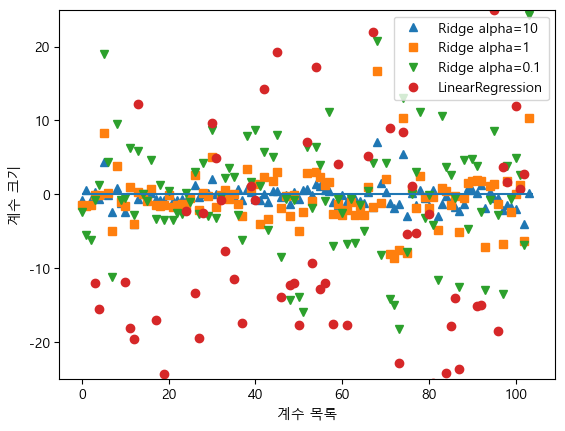

In [17]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

#  x축은 coef_의 원소를 위치
# x=0은 첫 번째 특성, x=1은 두 번째 특성...
# y 축은 각 계수의 수치

### 4.Lasso Regression으로 적용하기 : 보스턴 집값

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

# alpha=1 결과
# 훈련 세트 점수: 0.29
# 테스트 세트 점수: 0.21
# 사용한 특성의 수: 4

# 결과를 통해 Lasso는 과소적합하다는 것을 알 수 있다. 
# 사용한 특성수도 105개 중 4개로 우리는 alpha를 통해 복잡도를 조절할 필요가 있다.

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [22]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

# alpha=0.01 결과
# 훈련 세트 점수: 0.90
# 테스트 세트 점수: 0.77
# 사용한 특성의 수: 33

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [25]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

# alpha=0.0001 결과
# 훈련 세트 점수: 0.95
# 테스트 세트 점수: 0.64
# 사용한 특성의 수: 96

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, '계수 크기')

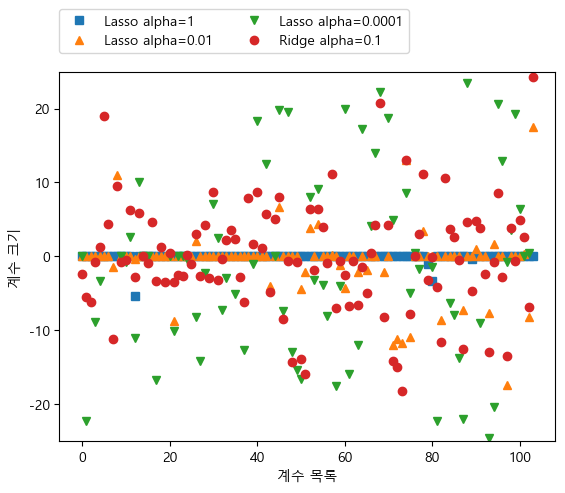

In [26]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")